### Importing libaries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# 1. Exploratory Data Analysis

C:\Users\shail\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

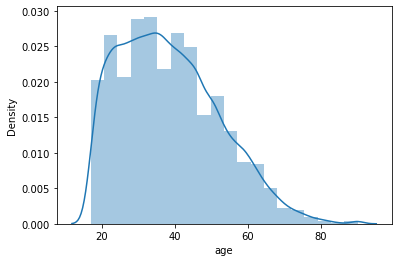

In [8]:
sns.distplot(df["age"],bins=20)

In [9]:
df["workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

C:\Users\shail\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

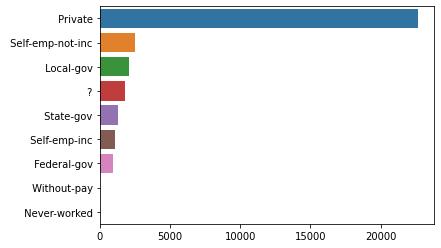

In [10]:
wc = df["workclass"].value_counts()
sns.barplot(wc.values, wc.index)

#### Here we see that most of the people doing private jobs

In [11]:
df["education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [12]:
df["education"].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

C:\Users\shail\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

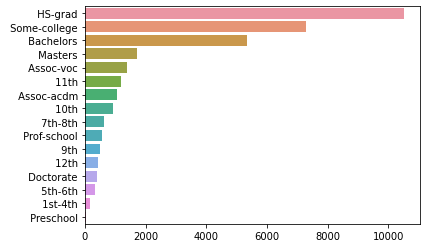

In [13]:
edu = df["education"].value_counts()
sns.barplot(edu.values, edu.index)

#### Here we can see that the majority of people have completed HS-Grad, College or Bachelors.

In [14]:
df["marital-status"].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [15]:
df["marital-status"].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

C:\Users\shail\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

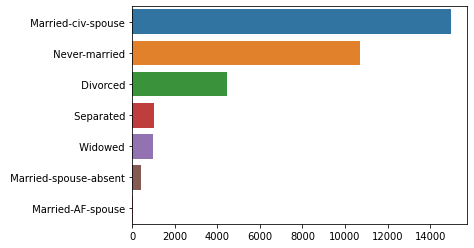

In [16]:
mr = df["marital-status"].value_counts()
sns.barplot(mr.values, mr.index)

#### here we can clearly see that most of the peole are married 

In [17]:
df["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [18]:
df["occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

C:\Users\shail\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

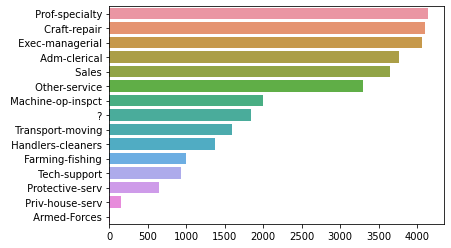

In [19]:
oc = df["occupation"].value_counts()
sns.barplot(oc.values, oc.index)

#### Here we can see that the majority of people occupation is Prof-specialty ,Craft-repair , Exec-managerial and Adm-clerical

In [20]:
df["relationship"].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [21]:
df["sex"].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

C:\Users\shail\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

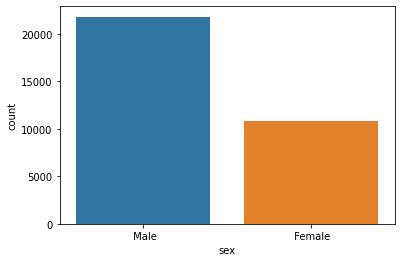

In [22]:
sns.countplot(df["sex"])

#### male are more then female

In [23]:
df["country"].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

C:\Users\shail\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


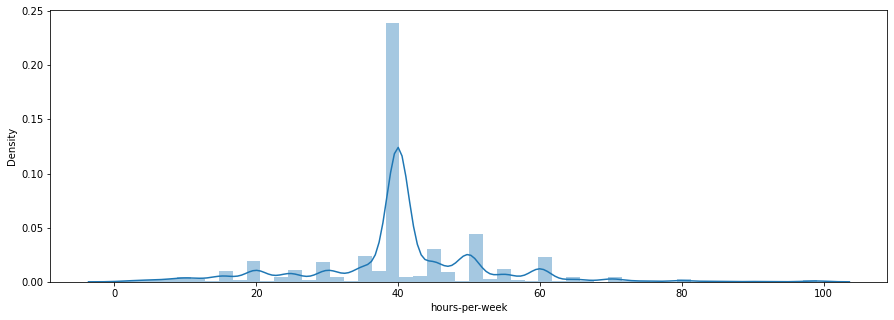

In [24]:
plt.figure(figsize=(15, 5))
sns.distplot(df["hours-per-week"])
plt.show()

#### from the above observation we can see that the average hours per week by an individual is 40

In [25]:
df["salary"].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

C:\Users\shail\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='count'>

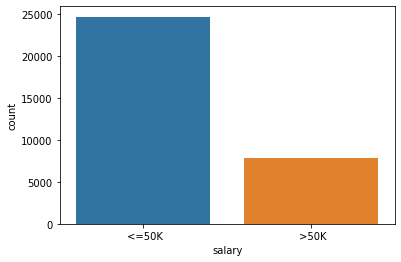

In [26]:
sns.countplot(df["salary"])

#### there are more number of people who's salary is less than 50k

<AxesSubplot:xlabel='sex', ylabel='count'>

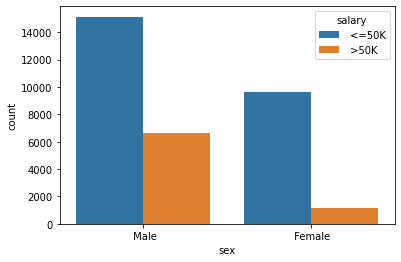

In [27]:
sns.countplot(x="sex", hue="salary", data=df)

#### Males have a higher salary than females

# 2. Data Pre-processing

### Checking missing values

In [28]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [29]:
df.isin(["?"]).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

#### there are no missing values in the dataset

### Label Encoding

In [30]:
for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        
        df[col] = le.fit_transform(df[col].astype(str))

In [31]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int32
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int32
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  int32
 6   occupation      32561 non-null  int32
 7   relationship    32561 non-null  int32
 8   race            32561 non-null  int32
 9   sex             32561 non-null  int32
 10  capital-gain    32561 non-null  int64
 11  capital-loss    32561 non-null  int64
 12  hours-per-week  32561 non-null  int64
 13  country         32561 non-null  int32
 14  salary          32561 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


### Feature selection

In [33]:
x = df.drop("salary", axis=1)
y = df["salary"]

In [34]:
selection = ExtraTreesClassifier()

In [35]:
selection.fit(x, y)

ExtraTreesClassifier()

In [36]:
selection.feature_importances_

array([0.15650146, 0.04453452, 0.16442632, 0.0382207 , 0.08542757,
       0.07450506, 0.07534115, 0.09240417, 0.01409412, 0.02671452,
       0.08840937, 0.02767108, 0.09424349, 0.01750647])

<AxesSubplot:>

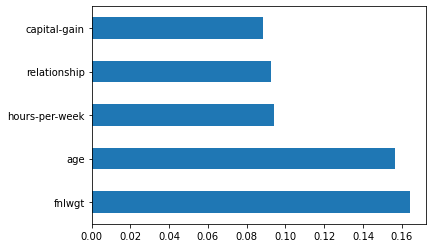

In [37]:
fea_imp = pd.Series(selection.feature_importances_, index=x.columns)
fea_imp.nlargest().plot(kind="barh")

In [38]:
for index, val in enumerate(fea_imp):
    print(index, round((val * 100), 2))

0 15.65
1 4.45
2 16.44
3 3.82
4 8.54
5 7.45
6 7.53
7 9.24
8 1.41
9 2.67
10 8.84
11 2.77
12 9.42
13 1.75


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int32
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int32
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  int32
 6   occupation      32561 non-null  int32
 7   relationship    32561 non-null  int32
 8   race            32561 non-null  int32
 9   sex             32561 non-null  int32
 10  capital-gain    32561 non-null  int64
 11  capital-loss    32561 non-null  int64
 12  hours-per-week  32561 non-null  int64
 13  country         32561 non-null  int32
 14  salary          32561 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [41]:
x = x.drop(['workclass', 'education', 'race', 'sex',
            'capital-loss', 'country', "capital-gain","relationship"], axis=1)

### Feature Scaling

In [42]:
for col in x.columns:
    scaler = StandardScaler()
    x[col] = scaler.fit_transform(x[col].values.reshape(-1, 1))

### Fixing imbalanced dataset

In [43]:
round(y.value_counts(normalize=True)*100, 2).astype(str) + "%"

0    75.92%
1    24.08%
Name: salary, dtype: object

In [44]:
rs = RandomOverSampler(random_state=42)

In [45]:
rs.fit(x, y)

RandomOverSampler(random_state=42)

In [46]:
x_resampled , y_resampled = rs.fit_resample(x , y)

In [47]:
round(y_resampled.value_counts(normalize=True)*100 , 2).astype(str) + "%"

0    50.0%
1    50.0%
Name: salary, dtype: object

### Creating train test split

In [48]:
x_train , x_test , y_train , y_test = train_test_split(x, y , random_state=0 , test_size=0.3)

In [49]:
x_train.shape , x_test.shape

((22792, 6), (9769, 6))

# 3. Model Building

###  Logistic Regression

In [50]:
lg_reg = LogisticRegression(random_state=42)

In [51]:
lg_reg.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [52]:
y_pred_lg_reg = lg_reg.predict(x_test)

In [53]:
y_pred_lg_reg

array([0, 0, 0, ..., 1, 0, 0])

### Decision Tree Classifier

In [54]:
tree = DecisionTreeClassifier(random_state=42)

In [55]:
tree.fit(x_train , y_train)

DecisionTreeClassifier(random_state=42)

In [56]:
y_pred_tree = tree.predict(x_test)

In [57]:
y_pred_tree

array([0, 0, 0, ..., 0, 0, 0])

### Random Forest Classifier

In [58]:
ran_for = RandomForestClassifier(random_state=42)

In [59]:
ran_for.fit(x_train , y_train)

RandomForestClassifier(random_state=42)

In [60]:
y_pred_ran_for = ran_for.predict(x_test)

In [61]:
y_pred_ran_for

array([0, 0, 0, ..., 1, 0, 0])

### Support Vector Classifier

In [62]:
sv = SVC(random_state=42)

In [63]:
sv.fit(x_train, y_train)

SVC(random_state=42)

In [64]:
y_pred_sv = sv.predict(x_test)

In [65]:
y_pred_sv

array([0, 0, 0, ..., 1, 0, 0])

# 4. Model Evaluation

In [66]:
print("LogisticRegression: ")
print("Accuracy score", round(accuracy_score(y_test , y_pred_lg_reg)*100, 2))
print("f1 score", round(f1_score(y_test , y_pred_lg_reg)*100 , 2))

LogisticRegression: 
Accuracy score 78.91
f1 score 44.35


In [67]:
print("Decision Tree Classifier")
print("Accuracy score", round(accuracy_score(y_test , y_pred_tree)*100, 2))

Decision Tree Classifier
Accuracy score 77.19


In [68]:
print("Random Forest Classifier")
print("Accuracy score ", round(accuracy_score(y_test , y_pred_ran_for)*100, 2))

Random Forest Classifier
Accuracy score  81.84


# 5. Hyperparameter Tuning

In [69]:
n_estimators = [int(x) for x in np.linspace(start=200 , stop=2000 , num=10)]

max_features = ["sqrt", "log2"]

max_depth = [int(x) for x in np.linspace(10 , 1000 , 10)]

min_samples_leaf = [1, 2, 4, 6 ,8]

min_samples_splits = [1 , 5, 10 , 15 , 20]

criterion = ["gini", "entropy", "log_loss"]

param_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_leaf": min_samples_leaf,
    "min_samples_split": min_samples_splits,
    "criterion": criterion
}

In [70]:
param_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['sqrt', 'log2'],
 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'min_samples_leaf': [1, 2, 4, 6, 8],
 'min_samples_split': [1, 5, 10, 15, 20],
 'criterion': ['gini', 'entropy', 'log_loss']}

In [71]:
rn = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator=rn,param_distributions=param_grid , cv=5 , n_iter=10 ,verbose=2 , random_state=100, n_jobs=1)

In [72]:
rf_randomcv.fit(x_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=entropy, max_depth=120, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   7.9s
[CV] END criterion=entropy, max_depth=120, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=  11.8s
[CV] END criterion=entropy, max_depth=120, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   5.5s
[CV] END criterion=entropy, max_depth=120, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   7.3s
[CV] END criterion=entropy, max_depth=120, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=  10.8s
[CV] END criterion=entropy, max_depth=340, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=1400; total time= 1.3min
[CV] END criterion=entropy, max_depth=340, max_features=log2, min_samples_leaf=6, min_sample

C:\Users\shail\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shail\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shail\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\shail\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 5, 10, 15, 20],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [73]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'log_loss'}

In [74]:
best_grid = rf_randomcv.best_estimator_

In [75]:
y_pred = best_grid.predict(x_test)

In [76]:
print(confusion_matrix(y_test , y_pred))
print(accuracy_score(y_test , y_pred))
# print(classification_report(y_test , y_pred))

[[6916  491]
 [1137 1225]]
0.8333503941037977


### Gridsearch CV

In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['log_loss'], 'max_depth': [10], 'max_features': ['sqrt'], 'min_samples_leaf': [2, 4, 6], 'min_samples_split': [13, 14, 15, 16, 17], 'n_estimators': [400, 500, 600, 700, 800]}


In [78]:
rf = RandomForestClassifier()

In [79]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3 , n_jobs=1 , verbose=2)

In [80]:
grid_search.fit(x_train , y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=13, n_estimators=400; total time=   8.5s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=13, n_estimators=400; total time=   9.8s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=13, n_estimators=400; total time=  11.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=13, n_estimators=500; total time=  10.4s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=13, n_estimators=500; total time=  12.1s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=13, n_estimators=500; total time=  11.6s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_sample

[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=16, n_estimators=800; total time=  19.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=16, n_estimators=800; total time=  29.5s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=17, n_estimators=400; total time=  10.5s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=17, n_estimators=400; total time=   9.5s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=17, n_estimators=400; total time=   8.8s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=17, n_estimators=500; total time=  12.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=17, n_estimators=500; total time=  13.8s
[CV] END crit

[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=800; total time=  25.8s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=800; total time=  20.9s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=800; total time=  20.2s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=16, n_estimators=400; total time=  10.3s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=16, n_estimators=400; total time=   9.8s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=16, n_estimators=400; total time=  10.6s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=16, n_estimators=500; total time=  14.9s
[CV] END crit

[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=14, n_estimators=700; total time=  14.6s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=14, n_estimators=800; total time=  15.8s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=14, n_estimators=800; total time=  17.2s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=14, n_estimators=800; total time=  44.2s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=15, n_estimators=400; total time=  35.3s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=15, n_estimators=400; total time=  28.5s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=15, n_estimators=400; total time=  26.3s
[CV] END crit

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['log_loss'], 'max_depth': [10],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [13, 14, 15, 16, 17],
                         'n_estimators': [400, 500, 600, 700, 800]},
             verbose=2)

In [81]:
grid_search.best_estimator_

RandomForestClassifier(criterion='log_loss', max_depth=10, min_samples_leaf=6,
                       min_samples_split=13, n_estimators=700)

In [82]:
grid_search.best_params_

{'criterion': 'log_loss',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 6,
 'min_samples_split': 13,
 'n_estimators': 700}

In [83]:
best_grid = grid_search.best_estimator_

In [84]:
y_pred = best_grid.predict(x_test)

In [85]:
print(confusion_matrix(y_test , y_pred))
print(accuracy_score(y_test , y_pred))
print(classification_report(y_test , y_pred))

[[6921  486]
 [1141 1221]]
0.8334527587265841
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      7407
           1       0.72      0.52      0.60      2362

    accuracy                           0.83      9769
   macro avg       0.79      0.73      0.75      9769
weighted avg       0.82      0.83      0.82      9769



In [86]:
import pickle

In [87]:
# open a file to store a model
file = open("random_forest.pkl", "wb")

pickle.dump(rf_randomcv , file)

In [88]:
scaling = open("scaling.pkl","wb")

pickle.dump(scaler, scaling)